# Shark attacks data cleaning

## ¿Los tiburones blancos prefieren la carne de un surfista o un buceador?

En este proyecto se busca dar una vuelta irónica a la información recopilada de ataques de tiburones a personas, con el fin de buscar las preferencias de los tiburones a la hora de comer.

Para ello se realizarán distintos métodos de limpieza de datos y aplicación de filtros para ver nuestros resultados.

- Importación de las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import Src.SharkFn as Fn

#Ver el archivo .py para saber qué hace cada función

- Creación del data frame Madre
Se crea únicamente con la finalidad de tener un backup, y hacer una primera exploración sobre los datos

In [2]:
df_Madre = pd.read_csv('Input/GSAF5.csv', encoding = "ISO-8859-1")

In [3]:
df_Madre.columns.values

array(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area',
       'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury',
       'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf',
       'href formula', 'href', 'Case Number.1', 'Case Number.2',
       'original order', 'Unnamed: 22', 'Unnamed: 23'], dtype=object)

In [4]:
print (df_Madre.shape)

(5992, 24)


In [5]:
null_cols = df_Madre.isnull().sum()
null_cols
null_cols[null_cols > 0]

Country                     43
Area                       402
Location                   496
Activity                   527
Name                       200
Sex                        567
Age                       2681
Injury                      27
Fatal (Y/N)                 19
Time                      3213
Species                   2934
Investigator or Source      15
href formula                 1
href                         3
Unnamed: 22               5991
Unnamed: 23               5990
dtype: int64

En este apartado iba viendo una a una los diferentes valores de las columnas, para ver qué me podía encontrar.

Además clasifiqué las columnas en las que podía limpar pero con esfuerzo, las facilmente limpiables y las que no tocaría ni con un palo

In [6]:
# Limpieza pero con esfuerzo:
# set(df_Madre['Activity'])
# set(df_Madre['Time'])
# set(df_Madre['Species '])
# set(df_Madre['Country'])

# Facilmente limpiables:
# print(df_Madre['Type'].value_counts())
# print(df_Madre['Sex '].value_counts())
# print(df_Madre['Fatal (Y/N)'].value_counts())

# Seguro que te quieres meter a analizar y comparar estos pares??
# set(df_Madre['Date'])
# set(df_Madre['Year'])

# set(df_Madre['Area'])
# set(df_Madre['Location'])

# set(df_Madre['Name'])
# set(df_Madre['Age'])
# set(df_Madre['Injury'])

    #-----------#
    # ERROR 404: NO TIME FOUND TO FIX THIS:
        # set(df_Madre['Case Number'])
        # set(df_Madre['Investigator or Source'])
        # set(df_Madre['pdf'])
        # set(df_Madre['href formula'])
        # set(df_Madre['href'])
        # set(df_Madre['Case Number.1'])
        # set(df_Madre['Case Number.2'])
        # set(df_Madre['original order'])
        # set(df_Madre['Unnamed: 22'])
        # set(df_Madre['Unnamed: 23'])

Una vez elegidas las posibles columnas a retocar, elimino las que no voy a tocar ni por asomo, y posteriormente arreglo algunos títulos de las columnas

In [7]:
to_drop = ['Case Number', 'Date', 'Year', 'Area', 'Location', 'Name',
           'Age', 'Injury','Investigator or Source','pdf','href formula','href',
           'Case Number.1','Case Number.2','original order','Unnamed: 22','Unnamed: 23']
df_raw = df_Madre
df_raw.drop(to_drop, inplace=True, axis=1)


In [8]:
df_raw.rename(columns = {'Species ': 'Species',
                        'Sex ': 'Sex',
                        'Fatal (Y/N)' : 'Fatal'}, inplace=True)
df_raw.columns.values

array(['Type', 'Country', 'Activity', 'Sex', 'Fatal', 'Time', 'Species'], dtype=object)

### Limpiando Sex:
Al final no utilicé esta columna, pero me gustaría implementarla en un futuro, por eso la dejo aquí.
- Añadí además una condición para rellenar esos NaN que fuera por porcentaje de las actuales víctimas
- M = 0.89 y F = 0.11


In [9]:
df_raw.Sex = Fn.clean_last_ws(df_raw.Sex.str)

df_raw.loc[(df_raw.Sex == '.')|
           (df_raw.Sex == 'N')|
           (df_raw.Sex == 'lli'), 'Sex'] = np.nan

import random
df_raw.Sex.fillna('*', inplace = True)
lst_sex=[]

for e in df_raw.Sex:
    if e == "*":
        rand = int(random.random()*100)
        if rand <= 89:
            lst_sex.append("M")
        else:
            lst_sex.append("F")
    else:
        lst_sex.append(e)

df_raw["Genre"] = lst_sex
        
df_raw.Genre.value_counts(dropna=False)

M    5348
F     644
Name: Genre, dtype: int64

### Limpiando Fatal:
Al igual que la anterior, final no utilicé esta columna, pero me gustaría implementarla en un futuro, por eso la dejo aquí.
- En este caso los NaN los metería en que sí han sido fatales

In [10]:
df_raw.Fatal = Fn.clean_first_ws(df_raw.Fatal.str)
df_raw.Fatal = Fn.clean_last_ws(df_raw.Fatal.str)
df_raw.Fatal = df_raw.Fatal.str.capitalize()

df_raw.loc[(df_raw.Fatal == '#value!')|
           (df_raw.Fatal == 'F')|
           (df_raw.Fatal == 'Unknown'), 'Fatal'] = np.nan

df_raw.Fatal.fillna('Y', inplace = True)

df_raw.Fatal.value_counts(dropna=False)

N    4325
Y    1667
Name: Fatal, dtype: int64

### Limpiando Species:

En primer lugar quién me manda meterme en esta columna pensando que iba a sacar oro de ella...
Pero bueno, lo primero que hago es una limpieza general de cosas raras que puede haber dentro de cada valor, e iba viendo poco a poco cómo iba quedando.

(Ver el archivo .py para saber qué hace cada función)

In [11]:
df_raw.Species = Fn.clean_weird_ch(df_raw.Species.str)
df_raw.Species = Fn.clean_1to2_ch(df_raw.Species.str)
df_raw.Species = Fn.clean_num(df_raw.Species.str)
df_raw.Species = Fn.clean_mult_ws(df_raw.Species.str)
df_raw.Species = Fn.clean_last_ws(df_raw.Species.str)
df_raw.Species = Fn.clean_first_ws(df_raw.Species.str)

# set(df_raw['Species'])

#### "Bueno aquí es donde la matan" - Boyander 

- En primer lugar me di cuenta de que había algunas entradas vacías o se habían quedado vacías después de la limpia y les asigné el valor NaN con la función np.nan


- Posteriormente todos los NaN los sustituyo por "shark" ya que si están registrados, aunque no pertenezcan a una serie en concreto, serán tiburones, y además pasé todos los caracteres a minúscula.


- Despúes hice un .findall haciendo uso de la "complejidad" del idioma de Shakespeare, sabiendo que la raza del tiburón iría precedida de "shark".


- Pasé el resultado del .findall, definiendo en el camino el tipo "undef."


- Finalmente hago una agrupación de los nombres para referirse a la misma especie de tiburón (buscando en Wiki).

In [12]:
df_raw.loc[(df_raw.Species == ''), 'Species'] = np.nan

df_raw.Species.fillna('shark', inplace = True)
df_raw.Species = df_raw.Species.str.lower()

df_raw.Species = df_raw.Species.str.findall(r"\w+\sshark")

lst_cc_sp = []
for e in df_raw.Species:
    if e == []:
        lst_cc_sp.append("undef. shark")
    else:
        lst_cc_sp.append(e[0])

df_raw["Shark_sp"] = lst_cc_sp
# df_raw.Shark_sp.value_counts()

df_raw.loc[(df_raw.Shark_sp == 'bonito shark'), 'Shark_sp'] = "mako shark"

df_raw.loc[(df_raw.Shark_sp == 'sandtiger shark')|
           (df_raw.Shark_sp == 'raggedtooth shark'), 'Shark_sp'] = "nurse shark"

df_raw.loc[(df_raw.Shark_sp == 'zambesi shark'), 'Shark_sp'] = "bull shark"

df_raw.loc[(df_raw.Shark_sp == 'whitetip shark')|
           (df_raw.Shark_sp == 'whaler shark'), 'Shark_sp'] = "copper shark"

df_raw.loc[(df_raw.Shark_sp != 'white shark')&
           (df_raw.Shark_sp != 'tiger shark')&
           (df_raw.Shark_sp != 'bull shark')&
           (df_raw.Shark_sp != 'nurse shark')&
           (df_raw.Shark_sp != 'copper shark')&
           (df_raw.Shark_sp != 'reef shark')&
           (df_raw.Shark_sp != 'blacktip shark')&
           (df_raw.Shark_sp != 'mako shark')&
           (df_raw.Shark_sp != 'hammerhead shark'), 'Shark_sp'] = "undef. shark"


df_raw.Shark_sp.value_counts().head(10)

undef. shark        4446
white shark          614
tiger shark          259
bull shark           197
nurse shark          157
copper shark          91
reef shark            67
blacktip shark        64
mako shark            53
hammerhead shark      44
Name: Shark_sp, dtype: int64

### Limpiando Activity:

Aquí más de lo mismo que arriba solo que para detectar el tipo de actividad, de nuevo me basé en la "complejidad" del lenguaje de Shakespeare, sabiendo que el tipo de la actividad vendría dado por la terminación en "-ing" como el Banco. (Y sí también busqué los terminados en -ed pero no eran suficientes)

In [13]:
df_raw.Activity.fillna('undefing', inplace = True)
df_raw.Activity = df_raw.Activity.str.lower()

df_raw.Activity = df_raw.Activity.str.findall(r"\w+ing")

# df_raw.Activity

lst_cc_act = []
for e in df_raw.Activity:
    if e == []:
        lst_cc_act.append("undef. act")
    else:
        lst_cc_act.append(e[0])

df_raw["Deadly_act"] = lst_cc_act

df_raw.loc[(df_raw.Deadly_act == 'spearfishing')|
           (df_raw.Deadly_act == 'collecting')|
           (df_raw.Deadly_act == 'netting'), 'Deadly_act'] = "fishing"

df_raw.loc[(df_raw.Deadly_act == 'bathing')|
           (df_raw.Deadly_act == 'lifesaving')|
           (df_raw.Deadly_act == 'attempting')|
           (df_raw.Deadly_act == 'splashing')|
           (df_raw.Deadly_act == 'wading'), 'Deadly_act'] = "swimming"

df_raw.loc[(df_raw.Deadly_act == 'snorkeling')|
           (df_raw.Deadly_act == 'skindiving')|
           (df_raw.Deadly_act == 'filming')|
           (df_raw.Deadly_act == 'freediving'), 'Deadly_act'] = "diving"

df_raw.loc[(df_raw.Deadly_act == 'standing')|
           (df_raw.Deadly_act == 'floating')|
           (df_raw.Deadly_act == 'treading')|
           (df_raw.Deadly_act == 'walking')|
           (df_raw.Deadly_act == 'sinking')|
           (df_raw.Deadly_act == 'boating')|
           (df_raw.Deadly_act == 'boarding'), 'Deadly_act'] = "sailing"

df_raw.loc[(df_raw.Deadly_act == 'kayaking')|
           (df_raw.Deadly_act == 'skiing')|
           (df_raw.Deadly_act == 'playing')|
           (df_raw.Deadly_act == 'canoeing')|
           (df_raw.Deadly_act == 'windsurfing')|
           (df_raw.Deadly_act == 'rowing')|
           (df_raw.Deadly_act == 'paddling')|
           (df_raw.Deadly_act == 'sitting'), 'Deadly_act'] = "surfing"

df_raw.loc[(df_raw.Deadly_act == 'undefing')|
           ((df_raw.Deadly_act != 'fishing')&
            (df_raw.Deadly_act != 'diving')&
            (df_raw.Deadly_act != 'sailing')&
            (df_raw.Deadly_act != 'surfing')&
           (df_raw.Deadly_act != 'swimming')), 'Deadly_act'] = "undef. act"


df_raw.Deadly_act.value_counts().head(6)


swimming      1430
undef. act    1238
surfing       1198
fishing       1105
diving         622
sailing        399
Name: Deadly_act, dtype: int64

## Finalmente se agrupa todo de forma coherente:

In [14]:
lst_shark = ["white shark", "tiger shark", "bull shark", "nurse shark", "copper shark",
             "reef shark","blacktip shark","mako shark","hammerhead shark", "undef. shark"]

lst_shark_red = ["white shark", "tiger shark", "bull shark", "undef. shark"]

lst_act = ["swimming", "surfing", "fishing", "diving", "sailing"]

lst_genre = ["M", "F"]

# ----

df_new = df_raw.loc[ df_raw.Shark_sp.isin(lst_shark_red), ['Shark_sp', 'Deadly_act'] ]

df_new_out = df_new.groupby('Shark_sp').Deadly_act.value_counts(normalize=True)

display(df_new_out)
print("\n------\n")
# ----

df_new2 = df_raw.loc[ df_raw.Shark_sp.isin(lst_shark_red), ['Shark_sp', 'Deadly_act', 'Genre'] ]
df_new2_out = df_new2.groupby (['Shark_sp', 'Deadly_act']).Genre.value_counts(normalize=True)
display (df_new2_out)
# ----

df_new.to_csv('Output/output_red.csv')
df_new2.to_csv('Output/output_red_genre.csv')

Shark_sp      Deadly_act
bull shark    swimming      0.319797
              fishing       0.248731
              surfing       0.167513
              undef. act    0.111675
              sailing       0.086294
              diving        0.065990
tiger shark   surfing       0.262548
              fishing       0.177606
              swimming      0.169884
              diving        0.154440
              undef. act    0.135135
              sailing       0.100386
undef. shark  swimming      0.264732
              undef. act    0.238417
              surfing       0.184435
              fishing       0.160369
              diving        0.085245
              sailing       0.066802
white shark   surfing       0.327362
              fishing       0.214984
              diving        0.179153
              swimming      0.127036
              undef. act    0.086319
              sailing       0.065147
Name: Deadly_act, dtype: float64


------



Shark_sp      Deadly_act  Genre
bull shark    diving      M        0.923077
                          F        0.076923
              fishing     M        0.979592
                          F        0.020408
              sailing     M        0.647059
                          F        0.352941
              surfing     M        0.909091
                          F        0.090909
              swimming    M        0.809524
                          F        0.190476
              undef. act  M        0.818182
                          F        0.181818
tiger shark   diving      M        0.850000
                          F        0.150000
              fishing     M        0.913043
                          F        0.086957
              sailing     M        0.923077
                          F        0.076923
              surfing     M        0.852941
                          F        0.147059
              swimming    M        0.704545
                          F        0.295455


# Resultado final:

## Los tiburones blancos prefieren surfistas

In [15]:
import matplotlib.pyplot as plt

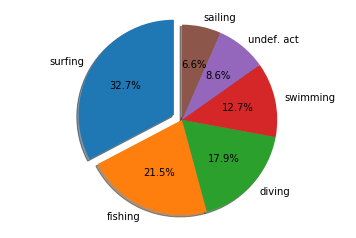

In [16]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'surfing', 'fishing', 'diving', 'swimming', 'undef. act', 'sailing'
sizes = [32.7, 21.5, 17.9, 12.7, 8.6, 6.6]
explode = (0.1, 0, 0, 0, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()